# Atividade 4

In [24]:
# Imports
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## 1. Em uma população normal com $\sigma = 20$, uma amostra aleatória de tamanho n obtemos $\bar{x} = 55,483$. Ao nível $\alpha = 5%$, faça um teste unilateral para a hipótese nula $\mu = 50$, quando:

(i) n=25
(ii) n=36
(iii)  n=64

In [25]:
desvio_padrao = 20
media_amostral = 55.483
significancia = .5
media = 50
tamanho_amostras = [25, 36, 64]

estatisticas = (media_amostral - media) / ( desvio_padrao/np.sqrt(tamanho_amostras))
pvalores = 1 - stats.norm.cdf(abs(estatisticas))

pd.DataFrame({'n': tamanho_amostras, 'Z': estatisticas, 'pvalor': pvalores}, index=['i', 'ii', 'iii'])

,n,Z,pvalor
i,25,1.37075,0.085226
ii,36,1.64490,0.049995
iii,64,2.19320,0.014146


## 2. O diâmetro do pino de metal usado em uma unidade de "disk-drive" é normalmente distribuída com média de 0,2508 e desvio padrão de 0,0005 unidades. A especificação de projeto do pino estabeleceu que o diâmetro deve ficar entre 0,2500 $\pm$ 0,0015 unidades. Determine a fração de defeituosos produzidos de acordo com a especificação.

In [26]:
media = .2508
desvio_padrao = .0005
spec = .25
desvio_spec = .0015
limites_spec = [spec - desvio_spec, spec + desvio_spec]

## 3. O comprimento do corpo do acendedor de cigarros utilizado em automóveis é monitorado em uma indústria utilizando gráficos de controle para $\bar{x}$ e R. A tabela a seguir fornece as medidas de 20 amostras de tamanho 4. (As medidas foram codificadas em mm; isto é, 15 é 5,15)

![Quadro](./imagens/Atividade4-Exercicio3.PNG)

### a) Construa os gráficos de controle para $\bar{x}$ e R. O processo está sob controle?

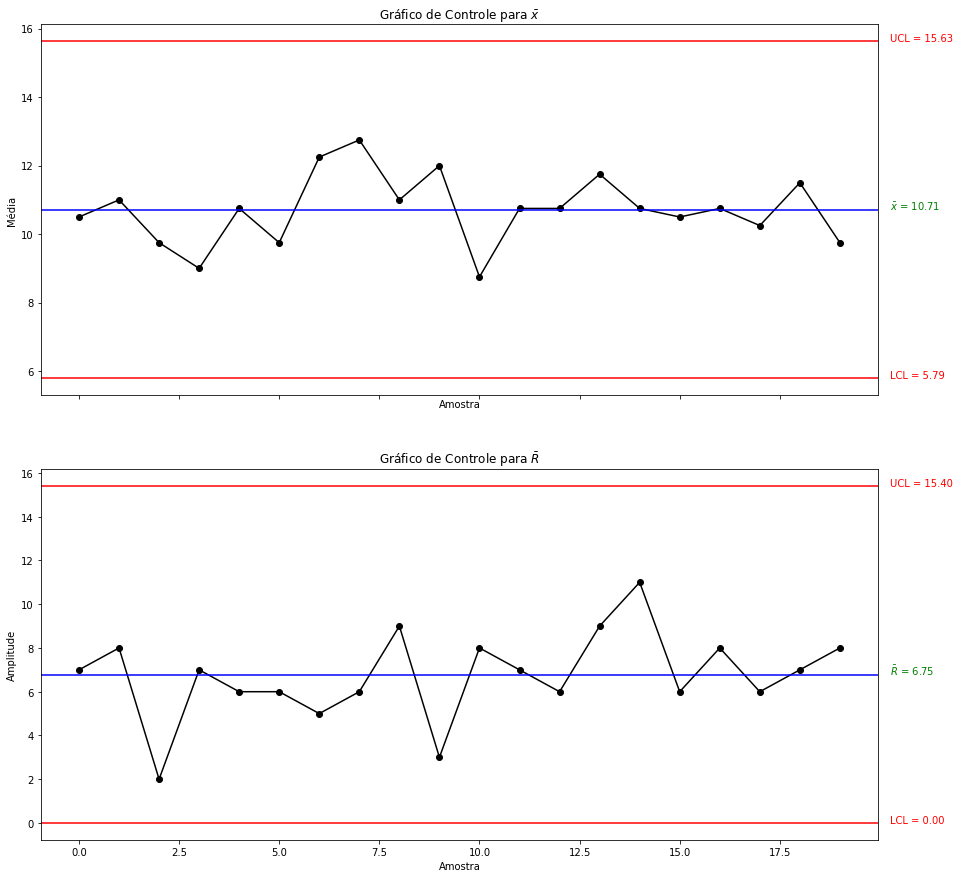

In [57]:
dados = pd.DataFrame({
    'amostras': range(1, 21),
    'medias': [10.5, 11, 9.75, 9, 10.75, 9.75, 12.25, 12.75, 11, 12, 8.75, 10.75, 10.75, 11.75, 10.75, 10.5, 10.75, 10.25, 11.5, 9.75],
    'amplitudes': [7, 8, 2, 7, 6, 6, 5, 6, 9, 3, 8, 7, 6, 9, 11, 6, 8, 6, 7, 8]
})

A2_tabelado = .729
D2_tabelado = 2.059
D3_tabelado = 0
D4_tabelado = 2.282

media = dados.medias.mean()
amplitude_media = dados.amplitudes.mean()
desvio_padrao = amplitude_media/D2_tabelado

limite_superior_xbarra = media + A2_tabelado * amplitude_media
limite_inferior_xbarra = media - A2_tabelado * amplitude_media

limite_superior_r = amplitude_media * D4_tabelado
limite_inferior_r = amplitude_media * D3_tabelado

fig, [grafico_xbarra, grafico_r] = plt.subplots(2, figsize=(15,15), sharex=True)

def configura_grafico_de_controle(grafico, ykey, controle, limite_superior, limite_inferior, ylabel, clabel):
    grafico.plot(dados[ykey], linestyle='-', marker='o', color='black')
    grafico.axhline(limite_superior, color='red')
    grafico.axhline(controle, color='blue')
    grafico.axhline(limite_inferior, color='red')
    grafico.set_title(f'Gráfico de Controle para {clabel}')
    grafico.set(xlabel='Amostra', ylabel=ylabel)
    left, right = grafico.get_xlim()
    grafico.text(right + 0.3, limite_superior, f'UCL = {limite_superior:.2f}', color='red')
    grafico.text(right + 0.3, controle, f'{clabel} = {controle:.2f}', color='green')
    grafico.text(right + 0.3, limite_inferior, f'LCL = {limite_inferior:.2f}', color='red')
    return grafico

grafico_xbarra = configura_grafico_de_controle(grafico_xbarra, 'medias', media, limite_superior_xbarra, limite_inferior_xbarra, 'Média', r'$\bar{x}$')
grafico_r = configura_grafico_de_controle(grafico_r, 'amplitudes', amplitude_media, limite_superior_r, limite_inferior_r, 'Amplitude', r'$\bar{R}$')

plt.show();